In [2]:
# 경고(warning)비표시
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.4 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [5]:
# 지지도 : 전체 거래 중 A와 B가 동시에 포함된거래의 비율
# 신뢰도 : 원인이 발생할 때, 결과가 발생할 가능성을 나타내는 지표
#             A를 구매했을 때, B를 추가로 구매할 확률
# 향상도 : A를 구매했을 때 B를 구매할 가능성에 관한 실제 지표
#           1보다 크면 A를 구매했을 때 B를 구매할 가능성이 높음.

In [6]:
dataset = [
    ['아메리카노', '카페라떼'],
    ['카페라떼', '아메리카노', '카푸치노'],
    ['바닐라라떼', '아메리카노'],
    ['녹차라떼', '카페라떼', '아메리카노'],
    ['카페모카', '아메리카노'],
    ['아메리카노', '카페라떼', '바닐라라떼'],
    ['초콜릿', '아메리카노'],
    ['아메리카노'],
    ['카페모카', '카페라떼', '카푸치노']
]

In [7]:
encoder = TransactionEncoder()

Transaction_matrix = encoder.fit(dataset).transform(dataset)
Transaction_matrix

array([[False, False,  True, False,  True, False, False],
       [False, False,  True, False,  True, False,  True],
       [False,  True,  True, False, False, False, False],
       [ True, False,  True, False,  True, False, False],
       [False, False,  True, False, False,  True, False],
       [False,  True,  True, False,  True, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False,  True,  True,  True]])

In [9]:
## 컬럼명 가져오기(중복 제거 하고)

item_list = set([ j for i in dataset for j in i])
print(item_list)

{'바닐라라떼', '카푸치노', '카페라떼', '카페모카', '아메리카노', '녹차라떼', '초콜릿'}


In [10]:
transaction_df = pd.DataFrame(Transaction_matrix)
transaction_df.columns = ['녹차 라떼', '바닐라 라떼', '아메리카노', '초콜릿', '카페 라떼', '카페 모카', '카푸치노']
display(transaction_df)

,녹차 라떼,바닐라 라떼,아메리카노,초콜릿,카페 라떼,카페 모카,카푸치노
0,False,False,True,False,True,False,False
1,False,False,True,False,True,False,True
2,False,True,True,False,False,False,False
3,True,False,True,False,True,False,False
4,False,False,True,False,False,True,False
5,False,True,True,False,True,False,False
6,False,False,True,True,False,False,False
7,False,False,True,False,False,False,False
8,False,False,False,False,True,True,True


In [13]:
## apriori 함수로 연관분석 (지지도 계산 (support) 하나만 사는 사람, 두가지 사는 사람 홧률)

itemset = apriori(transaction_df, min_support = 0.2, use_colnames = True ) 
itemset

,support,itemsets
0,0.222222,(바닐라 라떼)
1,0.888889,(아메리카노)
2,0.555556,(카페 라떼)
3,0.222222,(카페 모카)
4,0.222222,(카푸치노)
5,0.222222,"(아메리카노, 바닐라 라떼)"
6,0.444444,"(아메리카노, 카페 라떼)"
7,0.222222,"(카푸치노, 카페 라떼)"


In [14]:
# 지지도 0.2 이상인 itemset 중 신뢰도와 향상도 확인 (최소 신뢰도 0.3이상)

association_rules(itemset, metric = 'confidence', min_threshold = 0.3 )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(바닐라 라떼),(아메리카노),0.222222,0.888889,0.222222,1.0,1.125,0.024691,inf,0.142857
1,(아메리카노),(카페 라떼),0.888889,0.555556,0.444444,0.5,0.900,-0.049383,0.888889,-0.500000
2,(카페 라떼),(아메리카노),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556,-0.200000
3,(카푸치노),(카페 라떼),0.222222,0.555556,0.222222,1.0,1.800,0.098765,inf,0.571429
4,(카페 라떼),(카푸치노),0.555556,0.222222,0.222222,0.4,1.800,0.098765,1.296296,1.000000


In [15]:
# 바닐라 라떼 선택시 아메리카노 선택(각각은 0.222..,0.888.., 동시선택 확률(지지도)는 0.222
# 그 선택의 신뢰성은 1.0, lift (향상도; 1보다 크면 양의 상관관계)
# Antecedent Support(선행사건 지지도): 전체 거래 중에서 선행사건이 포함된 거래의 비율. 
# 즉, 선행사건이 얼마나 자주 나타나는지
# Consequent Support(후행사건 지지도): 전체 거래 중에서 후행사건이 포함된 거래의 비율. 
# 후행사건의 전체적인 발생 빈도
# Support(지지도): 전체 거래 중에서 선행사건과 후행사건이 모두 포함된 거래의 비율. 
# 이는 두 항목 간의 동시 발생 빈도
# Confidence(신뢰도): 선행사건이 일어났을 때 후행사건이 발생할 조건부 확률. 
# 즉, 규칙이 얼마나 신뢰성 있는지
# Lift(리프트): 규칙의 효과적인 정도를 나타내는 지표로, 
# 1보다 크면 양의 상관관계가 있다는 것을 의미, 1보다 작으면 음의 상관관계

# Leverage(레버리지): 선행사건과 후행사건이 함께 발생하는 빈도와 독립적인 경우에 기대되는 
# 빈도 간의 차이
## 값이 0이라면 두 사건이 서로 독립적이며, 
## 양수인 경우 두 사건이 함께 발생하는 빈도가 기대보다 높다는 것
## 음수인 경우 두 사건이 함께 발생하는 빈도가 기대보다 낮다는 것을 의미
## 단순한 동시 발생 빈도의 측정이므로, 다른 지표들과 함께 고려하여 규칙의 특성을 파악하는 데 사용
## Conviction(확신도): 후행사건이 발생했을 때 선행사건이 발생할 확률을 
## 후행사건이 독립적일 때의 확률로 나눈 값. 값이 높을수록 규칙의 신뢰성이 높다고 해석
## 1보다 크면 규칙이 신뢰성이 높다고 판단
## 확신도가 2라면, 후행사건이 발생하면 선행사건이 발생할 확률이 독립적인 경우보다 2배 높다는 의미

# Zhang's metric(장의 지표): 연관성을 나타내는 다른 지표들과 유사한 역할을 하는 지표 중 하나로, 
# 연관성을 계산하는 데 사용

In [16]:
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'], 
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

In [18]:
te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[ True,  True, False,  True, False,  True, False, False,  True,
        False,  True],
       [ True,  True,  True,  True, False,  True, False, False, False,
        False,  True],
       [ True, False, False, False, False,  True, False,  True,  True,
        False, False],
       [False,  True, False, False,  True, False, False, False,  True,
         True,  True],
       [False,  True, False,  True,  True,  True,  True, False, False,
        False, False]])

In [21]:
item_list2 = set([ j for i in dataset for j in i])
print(item_list2)

{'Ice cream', 'Beans', 'Orange', 'Coke', 'Yogurt', 'Eggs', 'Kidney Beans', 'Corn', 'Milk', 'Cookie', 'Apple'}


In [25]:
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,Apple,Beans,Coke,Cookie,Corn,Eggs,Ice cream,Kidney Beans,Milk,Orange,Yogurt
0,True,True,False,True,False,True,False,False,True,False,True
1,True,True,True,True,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,True,True,False,False
3,False,True,False,False,True,False,False,False,True,True,True
4,False,True,False,True,True,True,True,False,False,False,False


In [28]:
itemset2 = apriori(df, min_support = 0.5, use_colnames = True ) 
itemset2

,support,itemsets
0,0.6,(Apple)
1,0.8,(Beans)
2,0.6,(Cookie)
3,0.8,(Eggs)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Beans, Cookie)"
8,0.6,"(Eggs, Beans)"
9,0.6,"(Beans, Yogurt)"


In [41]:
itemset2.sort_values('support', ascending = False )

,support,itemsets
1,0.8,(Beans)
3,0.8,(Eggs)
0,0.6,(Apple)
2,0.6,(Cookie)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Beans, Cookie)"
8,0.6,"(Eggs, Beans)"
9,0.6,"(Beans, Yogurt)"


In [43]:
##지지도가 0.6 이상인것
frequent_itemsets = apriori(df, min_support = 0.6, use_colnames = True ) 
frequent_itemsets

,support,itemsets
0,0.6,(Apple)
1,0.8,(Beans)
2,0.6,(Cookie)
3,0.8,(Eggs)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Beans, Cookie)"
8,0.6,"(Eggs, Beans)"
9,0.6,"(Beans, Yogurt)"


In [44]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [45]:
frequent_itemsets

,support,itemsets,length
0,0.6,(Apple),1
1,0.8,(Beans),1
2,0.6,(Cookie),1
3,0.8,(Eggs),1
4,0.6,(Milk),1
5,0.6,(Yogurt),1
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Eggs, Beans)",2
9,0.6,"(Beans, Yogurt)",2


In [55]:
frequent_itemset1 = frequent_itemsets[(frequent_itemsets['support'] >= 0.6 ) & (frequent_itemsets['length'] == 2)]

In [56]:
frequent_itemset1

,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Eggs, Beans)",2
9,0.6,"(Beans, Yogurt)",2
10,0.6,"(Eggs, Cookie)",2


In [58]:
rules1 = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.8 )
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
4,(Eggs),(Beans),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8,-0.25
5,(Beans),(Eggs),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8,-0.25
6,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
7,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50
8,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.00
9,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.50


In [59]:
rules2 = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.2 )
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
4,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
5,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
6,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.0
7,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5
8,"(Eggs, Beans)",(Cookie),0.6,0.6,0.6,1.00,1.666667,0.24,inf,1.0
9,"(Eggs, Cookie)",(Beans),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.5


In [60]:
tran = [['A', 'B', 'C', 'D', 'E'],
    ['B', 'C'],
    ['A', 'B', 'F'],
    ['A', 'B', 'G'],
    ['A', 'F', 'H']]

In [61]:
te1 = TransactionEncoder()

tran_ar = te1.fit(tran).transform(tran)
tran_ar

array([[ True,  True,  True,  True,  True, False, False, False],
       [False,  True,  True, False, False, False, False, False],
       [ True,  True, False, False, False,  True, False, False],
       [ True,  True, False, False, False, False,  True, False],
       [ True, False, False, False, False,  True, False,  True]])

In [62]:
df2 = pd.DataFrame(tran_ar, columns = te1.columns_)
df2

,A,B,C,D,E,F,G,H
0,True,True,True,True,True,False,False,False
1,False,True,True,False,False,False,False,False
2,True,True,False,False,False,True,False,False
3,True,True,False,False,False,False,True,False
4,True,False,False,False,False,True,False,True


In [67]:
freq = df2.sum().to_frame('Frequency')  # 각항목의 빈도수 보기
freq

,Frequency
A,4
B,4
C,2
D,1
E,1
F,2
G,1
H,1


In [68]:
# 지지도 계산

freq['Support'] = freq['Frequency']/len(tran)
freq

,Frequency,Support
A,4,0.8
B,4,0.8
C,2,0.4
D,1,0.2
E,1,0.2
F,2,0.4
G,1,0.2
H,1,0.2


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H')])

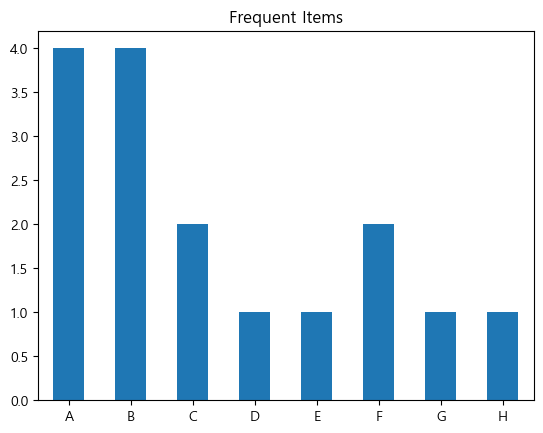

In [70]:
freq['Frequency'].plot(kind = 'bar', title = 'Frequent Items')
plt.xticks(rotation = 360)

<Axes: >

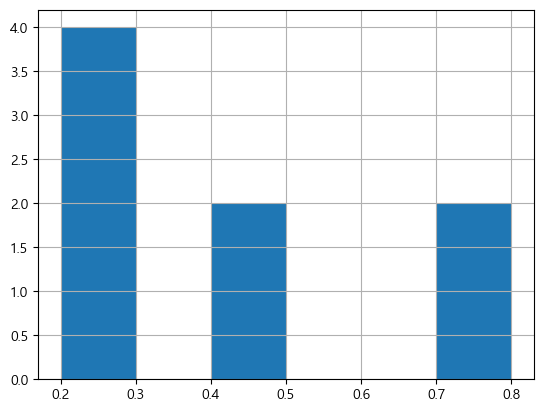

In [71]:
freq['Support'].hist(bins = 6)

In [69]:
itemset3 = apriori(df2, min_support = 0.1, use_colnames = True ) 
itemset3

,support,itemsets
0,0.8,(A)
1,0.8,(B)
2,0.4,(C)
3,0.2,(D)
4,0.2,(E)
5,0.4,(F)
6,0.2,(G)
7,0.2,(H)
8,0.6,"(B, A)"
9,0.2,"(C, A)"


In [72]:
## 최소지지도가 0.4인 데이터만
freq_items3 = apriori(df2, min_support=0.4, use_colnames=True)
freq_items3

,support,itemsets
0,0.8,(A)
1,0.8,(B)
2,0.4,(C)
3,0.4,(F)
4,0.6,"(B, A)"
5,0.4,"(F, A)"
6,0.4,"(C, B)"


In [73]:
rules4 = association_rules(freq_items3, metric = 'confidence', min_threshold = 0.7 )
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333


In [74]:
# 조건부가 (A) 인 경우

rules4[rules4.antecedents.apply(lambda x: 'A' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25


In [75]:
# 결론부가 (B) 인 경우

rules4[rules4.consequents.apply(lambda x: 'B' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
